# Ruch Browna, Proces Wienera

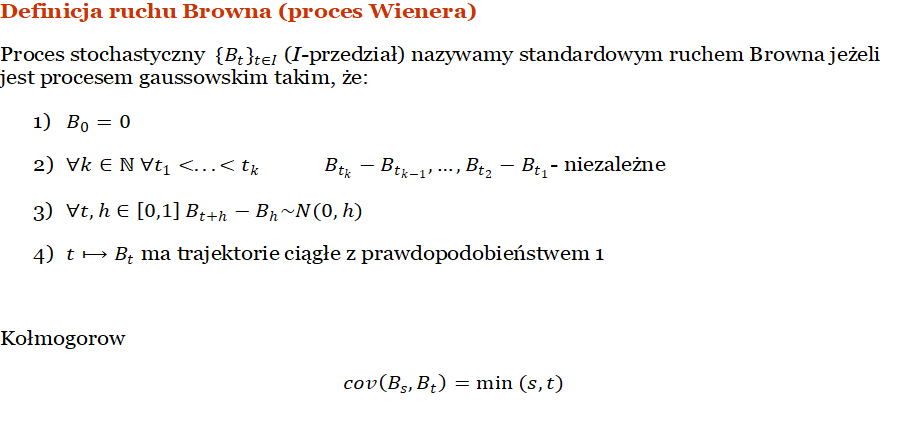

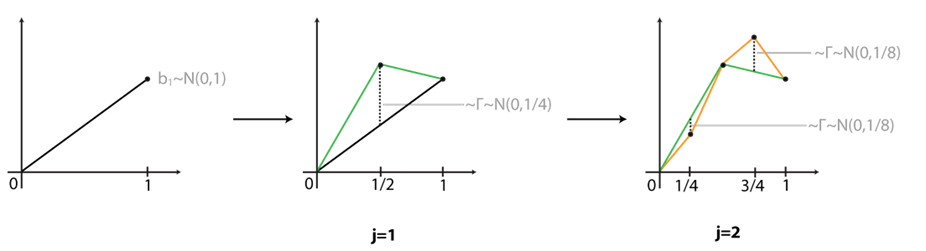
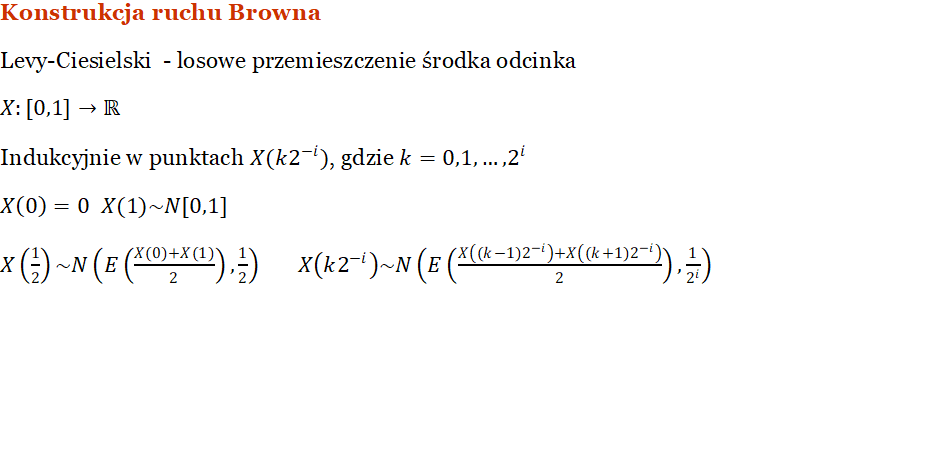

# Ułamkowe ruchy Browna, fractional Brownian motions (fBm)

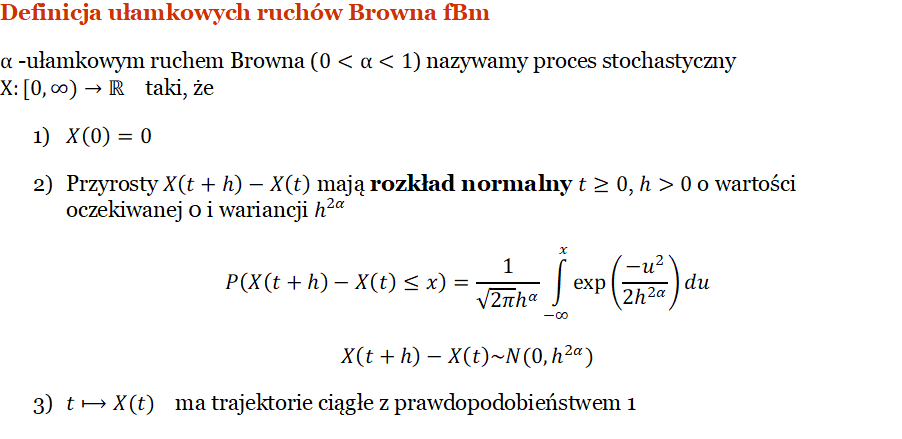

# 1. Algorytm generowania ułamkowych ruchów Browna, fractional Brownian motions

Algortym generowania fBm przy użyciu metody przekształcenia Fouriera. Procedura ta wykorzystuje Fast Fourier Transform (FFT) do efektywnego obliczania fBm w przestrzeni częstotliwości, a następnie przekształca wynik z powrotem do przestrzeni czasu/przestrzeni. 

https://users.math.yale.edu/public_html/People/frame/Fractals/Panorama/Art/MountainsSim/MountainsSim.html

In [ ]:
# Rysunek 2D

def rysunek_2D(surface, title):
    
    plt.figure(figsize=(10, 8))
    plt.imshow(surface, cmap='terrain')
    plt.colorbar()
    plt.title(title)
    plt.show()


In [ ]:
# Rysunek 3D

def rysunek_3D(surface, title, width=1024, height=1024):
    
    # Generowanie współrzędnych siatki
    x = np.linspace(0, 1, width)
    y = np.linspace(0, 1, height)
    x, y = np.meshgrid(x, y)

    # Tworzenie wykresu 3D
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Rysowanie powierzchni
    surf = ax.plot_surface(x, y, surface, cmap='terrain')

    # Dodanie paska kolorów
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    # Ustawienia wykresu
    ax.set_title(title)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Height')

    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def fbm2D(H, shape=(256, 256), length=(1, 1), p=0):
    """
    Generowanie 2D powierzchnii ułamkowych ruchów Browna (Fractional Brownian Motion) na prostokącie
    o wymiarach shape i o współczynniku Hursta 'H'.
    """
    
    np.random.seed(0)
    norm.ppf(0.5 + np.random.rand(4))

    n, m = shape
    N, M = n + p * (n - 1), m + p * (m - 1)
    Lx, Ly = length

    # Definicja częstotliwości przestrzeni Fouriera
    ky = np.fft.fftfreq(N) * 2 * np.pi / Lx
    kx = np.fft.fftfreq(M) * 2 * np.pi / Ly
    # np.fft.fftfreq(N) generuje próbkę częstotliwościowych składników dla FFT o N punktach.
    # Mnożenie przez 2 * np.pi / Lx i 2 * np.pi / Ly skaluje te częstotliwości do odpowiednich 
    # jednostek przestrzennych (gdzie Lx i Ly są wymiarami przestrzeni, w której generowany jest fBm).
    
    # korekta częstotliwości zerowej 
    # Koryguje się wartość dla częstotliwości zero (dc-component) w celu uniknięcia dzielenia przez zero 
    kx[0], ky[0] = kx[1], ky[1]
    
    # Tworzenie siatki częstotliwości
    KX, KY = np.meshgrid(kx, ky)

    # Tworzenie widma mocy, power spectrum
    K = np.sqrt(KX**2 + KY**2)
    K[0, 0] = 1.
    sK = K**(-H - 1)
    # Obliczane jest power spectrum, które jest niezbędne do skalowania fBm. 
    # Parametr H (współczynnik Hursta) kontroluje wymiar Minkowskiego powierzchni fBm.
    # Ustawienie K[0, 0] = 1 zapobiega dzieleniu przez zero.
    

    # Generowanie fBm w przestrzeni częstotliwości
    hW = np.fft.fft2(np.random.randn(*K.shape)) * sK
    # np.random.randn(*K.shape) generuje biały szum gaussowski o kształcie identycznym z siatką częstotliwości K.
    # np.fft.fft2 oblicza 2D FFT tego szumu.
    # Wynik jest mnożony przez sK (skalowane widmo mocy), aby uzyskać fBm w przestrzeni częstotliwości.
    
    # Przekształcenie wyniku z powrotem do przestrzeni czasu/przestrzeni
    h = np.fft.ifft2(hW).real
    # np.fft.ifft2 przekształca wynik z przestrzeni częstotliwości z powrotem do przestrzeni czasu/przestrzeni (w tym przypadku 2D).
    # .real jest używane do otrzymania rzeczywistej części wyniku, ponieważ fBm jest rzeczywistą funkcją.
    
    
    # przeskalowanie
    h = h[:n, :m]
    
    return h / np.std(h)

## Przykład 1a
Generowanie ułamkowych ruchów Browna z wykładnikiem Hursta równym $H=\frac{1}{2}$.

In [ ]:
H = 0.5  # wykładnik Hursta
surface_h1 = fbm2D(H, shape=(1024, 1024))

# wykres
rysunek_2D(surface_h1, '2D ułamkowe ruchy Browna fBm-Fractional Brownian z wykładnikiem Hursta H={}'.format(H))

In [ ]:
rysunek_3D(surface_h1, '2D ułamkowe ruchy Browna fBm-Fractional Brownian z wykładnikiem Hursta H={}'.format(H), width=1024, height=1024)

## Przykład 1b
Generowanie ułamkowych ruchów Browna z wykładnikiem Hursta równym $H=\frac{4}{5}$.

In [ ]:
H = 0.8  # wykładnik Hursta
surface_h2 = fbm2D(H, shape=(1024, 1024))

# wykres
rysunek_2D(surface_h2, '2D ułamkowe ruchy Browna fBm-Fractional Brownian z wykładnikiem Hursta H={}'.format(H))

In [ ]:
rysunek_3D(surface_h2, '2D ułamkowe ruchy Browna fBm-Fractional Brownian z wykładnikiem Hursta H={}'.format(H), width=1024, height=1024)

# 2. Algorytm fraktalnego szumu Perlin

Algorytm fraktalnego szumu Perlin, opracowany przez Kena Perlina w 1983 roku, jest stosowany w grafice komputerowej do tworzenia naturalnie wyglądających tekstur i krajobrazów. Oto główne cechy algorytmu:

## Wielowarstwowość (Octaves)
Fraktalny szum Perlin składa się z wielu warstw szumu Perlin, nazywanych *oktawami*. Każda oktawa ma podwojoną częstotliwość i zmniejszoną amplitudę w stosunku do poprzedniej. Sumowanie tych oktaw tworzy bardziej złożone i szczegółowe wzory.

## Interpolacja
Szum Perlin używa funkcji interpolujących, aby wygładzić przejścia między punktami siatki, na której generowane są wartości szumu, co pozwala na tworzenie płynnych gradientów.

## Gradacja
W algorytmie, każdy punkt siatki ma przypisany pseudolosowy wektor gradientu. Wartość szumu dla danego punktu jest obliczana jako iloczyn skalarny tego wektora gradientu i wektora od najbliższego punktu siatki do punktu, dla którego obliczamy szum.

## Powtarzalność i Niepowtarzalność
Szum Perlin jest deterministyczny, co oznacza, że dla tych samych parametrów wejściowych zawsze generuje tę samą teksturę. Dzięki obszernej przestrzeni parametrów, łatwo jest jednak tworzyć wiele unikalnych i różnorodnych wzorów.

## Zastosowania
Fraktalny szum Perlin jest szeroko stosowany do generowania realistycznych tekstur takich jak ogień, dym, woda, teren w grach i symulacjach (góry, chmury) oraz w animacji, aby nadać ruchom elementów sceny naturalny wygląd.

https://en.wikipedia.org/wiki/Perlin_noise

Algorytm ten jest ceniony za swoją zdolność do tworzenia realistycznych efektów bez wyraźnych powtórzeń czy sztuczności, które często towarzyszą prostszym algorytmom generowania szumu.


https://pypi.org/project/noise/

Algorytm szumu Perlin jest często stosowany w nowoczesnym CGI. Wykorzany do tekstur, animacji i wzmacnianie realizmu. Jest 

Pakiet noise zawiera natywne implementacje kodu Perlina „poprawionych” i prosty szum Perlina. Obejmuje również szybkie wdrożenie, do stosowania w shaderach OpenGL. 

Ulepszone funkcje noise Perlin mogą również generować fBm (fraktal Brownian Ruch) poprzez połączenie wielu oktaw szumu Perlina. 

https://pyglet.org/

### Uwaga instalacja pakietu **noise** wymaga instalacji Microsoft Visual C++ Build Tools

In [ ]:
# pip install noise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2

# Wymiary obrazu
width = 1024
height = 1024

# Parametry fraktala
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

# Generowanie fraktalnego krajobrazu
landscape = np.zeros((width, height))
for i in range(width):
    for j in range(height):
        landscape[i][j] = pnoise2(i / scale, 
                                  j / scale, 
                                  octaves=octaves, 
                                  persistence=persistence, 
                                  lacunarity=lacunarity, 
                                  repeatx=1024, 
                                  repeaty=1024, 
                                  base=42)

# Przykład 2a

In [ ]:
# Wyświetlanie krajobrazu
rysunek_2D(landscape, 'Algorytmu fraktalnego szumu Perlin')

In [ ]:
rysunek_3D(landscape, 'Algorytmu fraktalnego szumu Perlin')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise1

# Ustawienia dla fBm
octaves = 4  # Liczba poziomów szczegółowości
persistence = 0.5  # Wpływ amplitudy na szum na każdym oktawie
lacunarity = 2.0  # Częstotliwość wzrostu szumu na każdym oktawie

# Generowanie fBm
x_vals = np.linspace(0, 5, 1024)
fbm = np.array([pnoise1(x, octaves=octaves, persistence=persistence, lacunarity=lacunarity) for x in x_vals])

# Wykres fBm
plt.plot(x_vals, fbm)
plt.title('Fractal Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2

# Parametry siatki i szumu
rozmiar_siatki = 1024
skala = 0.1  # Skala wpływa na "zoom" szumu
oktawy = 6  # Ilość warstw szumu
persistencja = 0.5  # Amplituda każdej kolejnej oktawy
lacunarność = 2.0  # Częstotliwość każdej kolejnej oktawy

# Tworzenie siatki współrzędnych
x = np.linspace(0, 5, rozmiar_siatki)
y = np.linspace(0, 5, rozmiar_siatki)
X, Y = np.meshgrid(x, y)

# Generowanie fBm
fbm = np.zeros_like(X)
for i in range(rozmiar_siatki):
    for j in range(rozmiar_siatki):
        fbm[i][j] = pnoise2(X[i][j] * skala, Y[i][j] * skala, octaves=oktawy, persistence=persistencja, lacunarity=lacunarność)

## Przykład 2b

In [ ]:
rysunek_2D(fbm, '2D ułamkowe ruchy Browna fBm otrzymane na podstawie algorytmu Perlin')

In [ ]:
rysunek_3D(fbm, '2D ułamkowe ruchy Browna fBm otrzymane na podstawie algorytmu Perlin')

# 3. Algorytm Diamond-Square

Algorytm Diamond-Square, znany również jako algorytm Diamond-Square Displacement, jest procedurą rekurencyjną używaną do generowania fraktalnych map wysokości, które symulują trójwymiarowe krajobrazy. Poniżej opisano podstawowe kroki i mechanizmy tego algorytmu:

## 1. Inicjalizacja
Algorytm rozpoczyna się od kwadratu o ustalonych wartościach wysokości w czterech narożnikach. Te wartości mogą być wybrane losowo lub ustalone z góry, w zależności od potrzeb symulacji.

## 2. Krok Diamentu (Diamond Step)
Dla każdego kwadratu, obliczana jest średnia wartość wysokości z czterech narożników, a następnie dodawany jest losowy przesunięcie (displacement) do tej średniej. Wynikowy punkt umieszczany jest w środku kwadratu, tworząc "diament" z pięcioma punktami (cztery narożniki i środek).

## 3. Krok Kwadratu (Square Step)
Następnie dla każdego diamentu (który składa się z czterech nowych kwadratów utworzonych w kroku diamentu), obliczana jest średnia wartość z czterech punktów tworzących każdy kwadrat i środkowego punktu diamentu. Do tej średniej znów dodawane są losowe przesunięcia. To tworzy punkty w środku każdej krawędzi kwadratów.

## 4. Rekurencja
Po wykonaniu kroków diamentu i kwadratu dla całej mapy, algorytm jest rekurencyjnie aplikowany do nowo utworzonych, mniejszych kwadratów. Każda iteracja wprowadza mniejsze przesunięcia, co symuluje coraz mniejsze szczegóły terenu.

## 5. Zmniejszanie Szumu (Displacement Reduction)
Z każdą rekurencją, wartość losowego przesunięcia jest zmniejszana. Dzięki temu większe cechy terenu są utworzone na początkowych etapach, a mniejsze szczegóły są dodawane w późniejszych iteracjach. Często stosuje się tutaj współczynnik zmniejszający, który kontroluje, jak szybko przesunięcia stają się mniejsze.

## 6. Warunki Brzegowe
Algorytm musi również zarządzać warunkami brzegowymi, aby upewnić się, że generowane są płynne przejścia na krawędziach mapy, co jest szczególnie ważne, gdy generuje się wielokrotne, sąsiadujące segmenty terenu.

## 7. Wynik Końcowy
Po wielu iteracjach, mapę wysokości charakteryzuje fraktalna, naturalnie wyglądająca struktura terenu, z górami, dolinami i innymi cechami topograficznymi.

Algorytm Diamond-Square jest ceniony za swoją prostotę i zdolność do generowania realistycznych krajobrazów. Jest stosunkowo łatwy w implementacji, a wygenerowane mapy wysokości można łatwo dostosować do różnych zastosowań w grafice komputerowej, grach wideo i symulacjach.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def diamond_square(size, scale=1.0, ratio=0.5):
    # Inicjalizacja tablicy
    arr = np.zeros((size + 1, size + 1))
    
    # Ustawianie narożników
    arr[0, 0] = arr[0, -1] = arr[-1, 0] = arr[-1, -1] = scale

    def diamond(x, y, size, scale):
        avg = (arr[x, y] + arr[x + size, y] + arr[x, y + size] + arr[x + size, y + size]) / 4.0
        arr[x + size // 2, y + size // 2] = avg + np.random.uniform(-scale, scale)

    def square(x, y, size, scale):
        s2 = size // 2
        a1 = arr[x + s2, y] = (arr[x, y] + arr[x + size, y]) / 2 + np.random.uniform(-scale, scale)
        a2 = arr[x, y + s2] = (arr[x, y] + arr[x, y + size]) / 2 + np.random.uniform(-scale, scale)
        a3 = arr[x + size, y + s2] = (arr[x + size, y] + arr[x + size, y + size]) / 2 + np.random.uniform(-scale, scale)
        a4 = arr[x + s2, y + size] = (arr[x, y + size] + arr[x + size, y + size]) / 2 + np.random.uniform(-scale, scale)
        arr[x + s2, y + s2] = (a1 + a2 + a3 + a4) / 4 + np.random.uniform(-scale, scale)

    step_size = size
    while step_size > 1:
        half_step = step_size // 2

        for y in range(0, size, step_size):
            for x in range(0, size, step_size):
                diamond(x, y, step_size, scale)

        for y in range(0, size, step_size):
            for x in range(0, size, step_size):
                square(x, y, step_size, scale)

        step_size = step_size // 2
        scale *= ratio

    return arr

# Przykład 3

In [ ]:
# Wygenerowanie fraktalnego krajobrazu

landscape = diamond_square(size = 1024)

# Wyświetlenie wyniku
rysunek_2D(landscape, "Algorytm Dimond-Square")


In [ ]:
landscape.shape

In [ ]:
rysunek_3D(landscape, "Algorytm Dimond-Square", width=landscape.shape[0], height=landscape.shape[0])

# Krajobrazy w Minecraft

https://en.wikipedia.org/wiki/Perlin_noise#/media/File:Fractal_terrain_texture.jpg

Krajobrazy w Minecraft są generowane przy użyciu zmodyfikowanej wersji algorytmu szumu Perlin, który jest rodzajem szumu gradientowego. Szum Perlin jest powszechnie stosowany w grafice komputerowej do generowania naturalnie wyglądających tekstur, krajobrazów i innych złożonych, ale organicznych wzorów.

Oto kluczowe cechy generacji terenu w Minecraft:

## **1. Szum Perlin**

Algorytm ten pozwala na tworzenie płynnych, naturalnie wyglądających zmian wysokości terenu. W Minecraft, różne warstwy szumu są stosowane i łączone, aby stworzyć różnorodne cechy terenu, takie jak góry, doliny, jaskinie i wyspy.

## **2. Biomy**

Minecraft wykorzystuje pojęcie biomów do określenia różnych regionów w grze, takich jak lasy, pustynie, dżungle i tundra. Każdy biom ma unikalne cechy, takie jak rodzaj terenu, rodzaje roślinności, kolory trawy i liści, a także specyficzne struktury.

## **3. Struktury**

Oprócz naturalnie generowanego terenu, Minecraft tworzy również różne struktury, takie jak wioski, świątynie, kopalnie i inne. Są one generowane według określonych zasad i algorytmów, które określają, gdzie i jak powinny się pojawić.

## **4. Modyfikowalność**

Jeden z kluczowych aspektów Minecraft jest to, że świat gry może być modyfikowany przez gracza. Oznacza to, że generowany krajobraz jest nie tylko tłem, ale także płótnem do interakcji i tworzenia.

## **5. Losowość i Powtarzalność**

Chociaż światy są generowane losowo, każdy świat jest powiązany z unikalnym identyfikatorem (seed), który może być użyty do odtworzenia dokładnie tego samego świata.

# Zadanie 1
Wyznacz wymiar Minkowskiego dla wygnerowanych powierzchni z Przykładów 1-4.

# Zadanie 2
Wyznacz wymiar Minkowskiego dla ułamkowych ruchów Browna zmieniając wartość parametru H.

# Wykorzystanie biblioteki PyOpenGl do generowania fraktalnych krajobrazów

In [ ]:
# pip install PyOpenGL PyOpenGL_accelerate glfw numpy

### Prosty algorytm rysujący prostokąt na potrzeby poprawności instalacji biblioteki PyOpenGL

In [1]:
import glfw
from OpenGL.GL import *
import numpy as np

def main():
    # Inicjalizacja GLFW
    if not glfw.init():
        return

    # Utworzenie okna
    window = glfw.create_window(800, 600, "Prosty Rysunek PyOpenGL", None, None)
    if not window:
        glfw.terminate()
        return

    glfw.make_context_current(window)

    # Dane wierzchołków dla prostokąta
    vertices = np.array([
        -0.5, -0.5, 0.0,
         0.5, -0.5, 0.0,
         0.5,  0.5, 0.0,
        -0.5,  0.5, 0.0
    ], dtype=np.float32)

    # Bufor wierzchołków
    VBO = glGenBuffers(1)
    glBindBuffer(GL_ARRAY_BUFFER, VBO)
    glBufferData(GL_ARRAY_BUFFER, vertices.nbytes, vertices, GL_STATIC_DRAW)

    # Atrybuty wierzchołków
    glVertexAttribPointer(0, 3, GL_FLOAT, GL_FALSE, 3 * sizeof(GLfloat), ctypes.c_void_p(0))
    glEnableVertexAttribArray(0)

    # Pętla renderowania
    while not glfw.window_should_close(window):
        glClear(GL_COLOR_BUFFER_BIT)

        # Rysowanie prostokąta
        glDrawArrays(GL_LINE_LOOP, 0, 4)

        glfw.swap_buffers(window)
        glfw.poll_events()

    glfw.terminate()

if __name__ == "__main__":
    main()

In [2]:
import glfw
from OpenGL.GL import *
from OpenGL.GL.shaders import compileProgram, compileShader
import numpy as np

# Parametry okna
width, height = 800, 600

# Vertex Shader
vertex_shader = """
#version 330
layout(location = 0) in vec2 position;
void main()
{
    gl_Position = vec4(position, 0.0, 1.0);
}
"""

# Fragment Shader
fragment_shader = """
#version 330
out vec4 outColor;
uniform vec2 c;

void main()
{
    vec2 z = gl_FragCoord.xy / vec2(800, 600) * 2.0 - 1.0;
    z.x *= 800.0 / 600.0;
    int i;
    for(i=0; i<1000; i++) {
        z = vec2(z.x*z.x - z.y*z.y, 2*z.x*z.y) + c;
        if(length(z) > 2.0) break;
    }
    float brightness = float(i) / 1000.0;
    outColor = vec4(brightness, brightness, brightness, 1.0);
}
"""

# Inicjalizacja GLFW
if not glfw.init():
    raise Exception("GLFW nie może zostać zainicjalizowany")

# Utworzenie okna
window = glfw.create_window(width, height, "Zbiór Julia", None, None)
if not window:
    glfw.terminate()
    raise Exception("GLFW okno nie może zostać utworzone")

glfw.make_context_current(window)

# Konfiguracja shaderów
shader = compileProgram(compileShader(vertex_shader, GL_VERTEX_SHADER), compileShader(fragment_shader, GL_FRAGMENT_SHADER))

# Definiowanie wierzchołków (kwadrat na cały ekran)
vertices = np.array([-1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0], dtype=np.float32)

# VBO i VAO
VBO = glGenBuffers(1)
VAO = glGenVertexArrays(1)
glBindVertexArray(VAO)
glBindBuffer(GL_ARRAY_BUFFER, VBO)
glBufferData(GL_ARRAY_BUFFER, vertices.nbytes, vertices, GL_STATIC_DRAW)
glVertexAttribPointer(0, 2, GL_FLOAT, GL_FALSE, 0, None)
glEnableVertexAttribArray(0)

# Parametr zbioru Julia
c = np.array([-0.8, 0.156], dtype=np.float32)

# Pętla renderowania
while not glfw.window_should_close(window):
    glClear(GL_COLOR_BUFFER_BIT)

    glUseProgram(shader)
    glUniform2fv(glGetUniformLocation(shader, "c"), 1, c)

    glBindVertexArray(VAO)
    glDrawArrays(GL_TRIANGLE_FAN, 0, 4)

    glfw.swap_buffers(window)
    glfw.poll_events()

# Czyszczenie
glfw.terminate()
